In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, binom, expon, geom, poisson, ttest_1samp, ttest_ind, ttest_ind_from_stats, t,f, f_oneway,chi2, chisquare, chi2_contingency, levene, kruskal
import statsmodels.stats.api as sms

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089 -O yulu.csv

--2023-04-08 14:22:06--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 54.230.209.222, 54.230.209.194, 54.230.209.118, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|54.230.209.222|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘yulu.csv’

yulu.csv            100%[===================>] 633.16K   798KB/s    in 0.8s    

2023-04-08 14:22:08 (798 KB/s) - ‘yulu.csv’ saved [648353/648353]



In [ ]:
df = pd.read_csv("yulu.csv")

# Define Problem Statement and perform Exploratory Data Analysis

**Definition of problem (as per given problem statement with additional views)**

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

The company wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

How well those variables describe the electric cycle demands.

Check if the variables has significant changes in demands.


**Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary**

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
#Shape of data

df.shape

(10886, 12)

In [ ]:
## data type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.isna().sum()  ## checking null values

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
df.duplicated().sum() ## checking duplicates

0

In [ ]:
df.describe().T ## Statistical Summary on Data

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
datetime,10886,10886,2011-01-01 00:00:00,1


In [ ]:
## Checking counts and Unique Values

for i in df.columns.tolist():
  print (f"Unique Values of {i}: {np.unique(df[i])}")
  print(f"Total counts of each Values of {i}: {np.unique(df[i],return_counts=True)[1]}")
  print ("-"*100)

Unique Values of datetime: ['2011-01-01 00:00:00' '2011-01-01 01:00:00' '2011-01-01 02:00:00' ...
 '2012-12-19 21:00:00' '2012-12-19 22:00:00' '2012-12-19 23:00:00']
Total counts of each Values of datetime: [1 1 1 ... 1 1 1]
----------------------------------------------------------------------------------------------------
Unique Values of season: [1 2 3 4]
Total counts of each Values of season: [2686 2733 2733 2734]
----------------------------------------------------------------------------------------------------
Unique Values of holiday: [0 1]
Total counts of each Values of holiday: [10575   311]
----------------------------------------------------------------------------------------------------
Unique Values of workingday: [0 1]
Total counts of each Values of workingday: [3474 7412]
----------------------------------------------------------------------------------------------------
Unique Values of weather: [1 2 3 4]
Total counts of each Values of weather: [7192 2834  859    1]
-

**Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)**

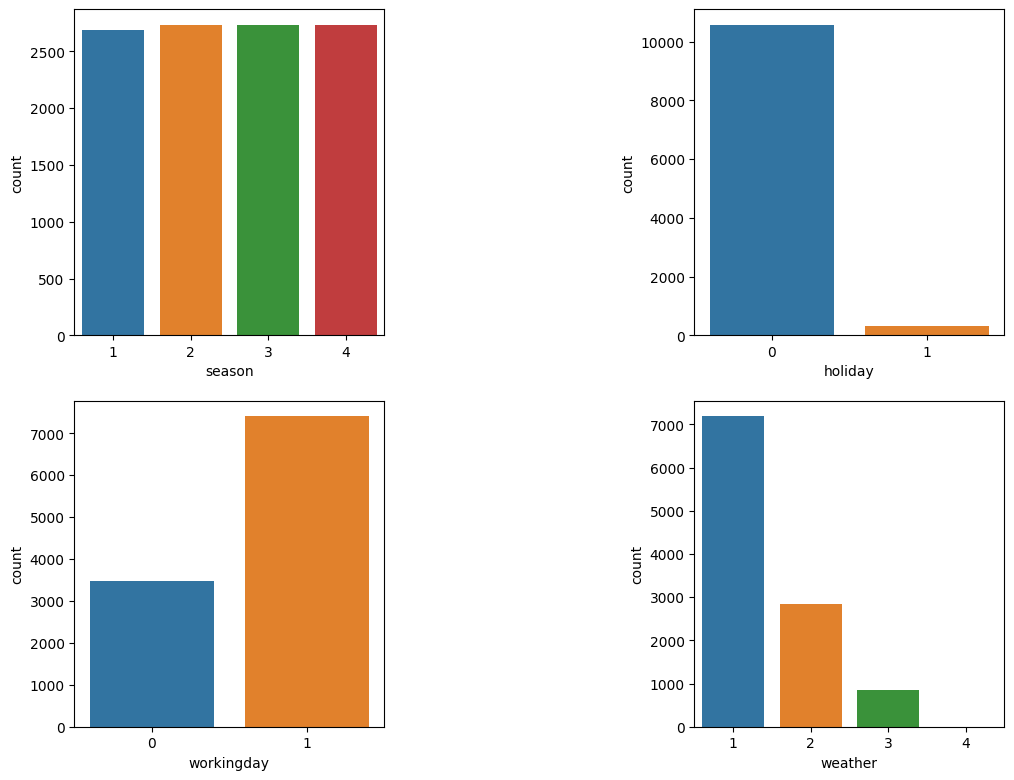

In [ ]:
data = df[['season','holiday','workingday','weather']]
plt.figure(figsize=(12,5))
plt.subplots_adjust(top=2,bottom=-1, wspace=1)
x=1
while x<5:
  for i in data:
    plt.subplot(4,2,x)
    sns.countplot(data, x = i)
    plt.xlabel(i)
    x+=1
  

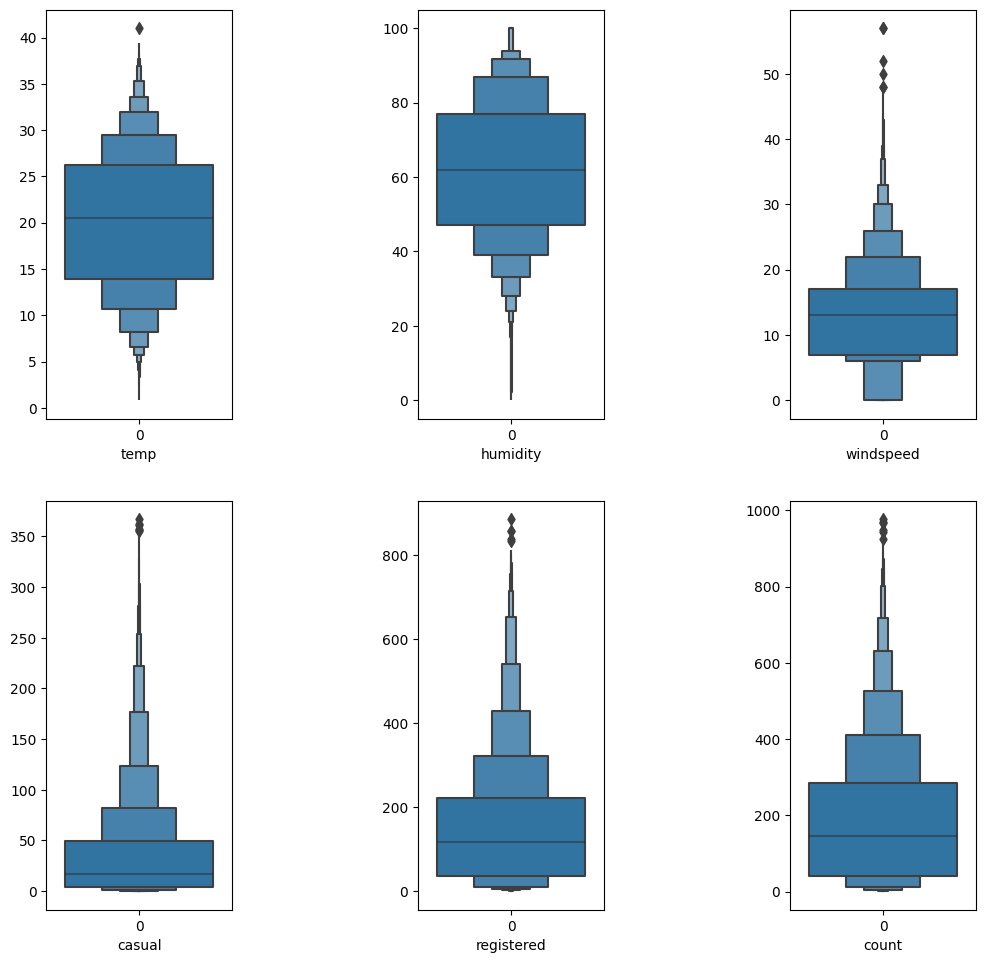

In [ ]:
data1 = df[['temp','humidity','windspeed','casual','registered','count']]
plt.figure(figsize=(12,3))
plt.subplots_adjust(top=2, bottom=-1, wspace=1)
x=1
while x<7:
  for i in data1:
    plt.subplot(2,3,x)
    sns.boxenplot(df[i], orient='v')
    plt.xlabel(i)
    x+=1

**Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count**

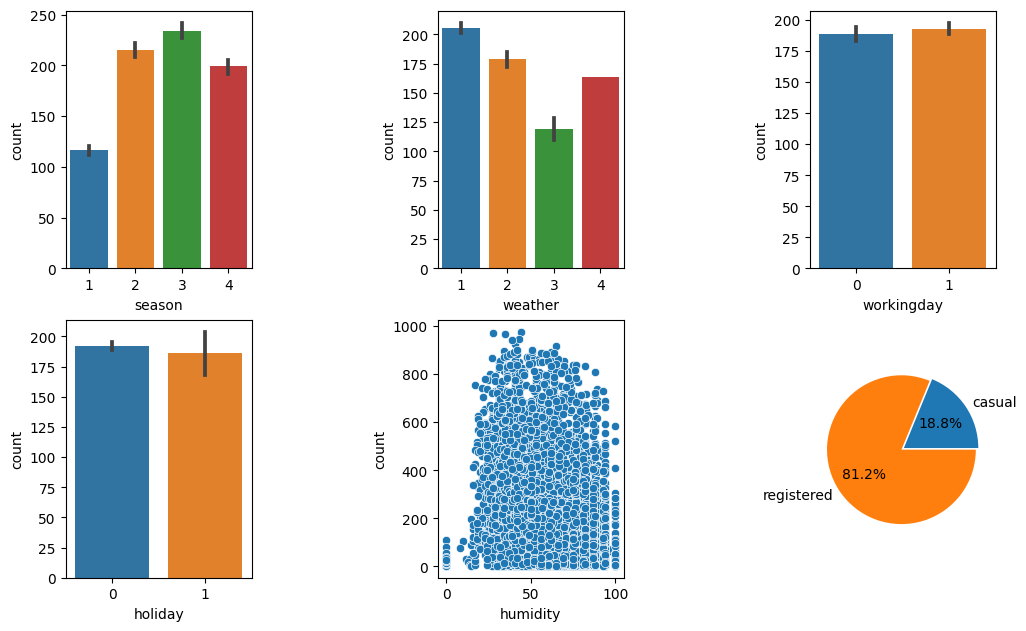

In [ ]:
plt.figure(figsize=(12,3))
plt.subplots_adjust(top=2, wspace=1)

plt.subplot(2,3,1)
sns.barplot(df, x = 'season', y = 'count', estimator=np.mean)

plt.subplot(2,3,2)
sns.barplot(df, x = 'weather', y = 'count', estimator=np.mean)

plt.subplot(2,3,3)
sns.barplot(df, x = 'workingday', y = 'count', estimator=np.mean)

plt.subplot(2,3,4)
sns.barplot(df, x = 'holiday', y = 'count', estimator=np.mean)

plt.subplot(2,3,5)
sns.scatterplot(df,  x='humidity', y='count')

plt.subplot(2,3,6)
a = df['casual'].sum()
b = df['registered'].sum()
labels =['casual','registered']
data = [a,b]
plt.pie(data, labels=labels, explode=[.02,.02],autopct='%1.1f%%')
plt.show()

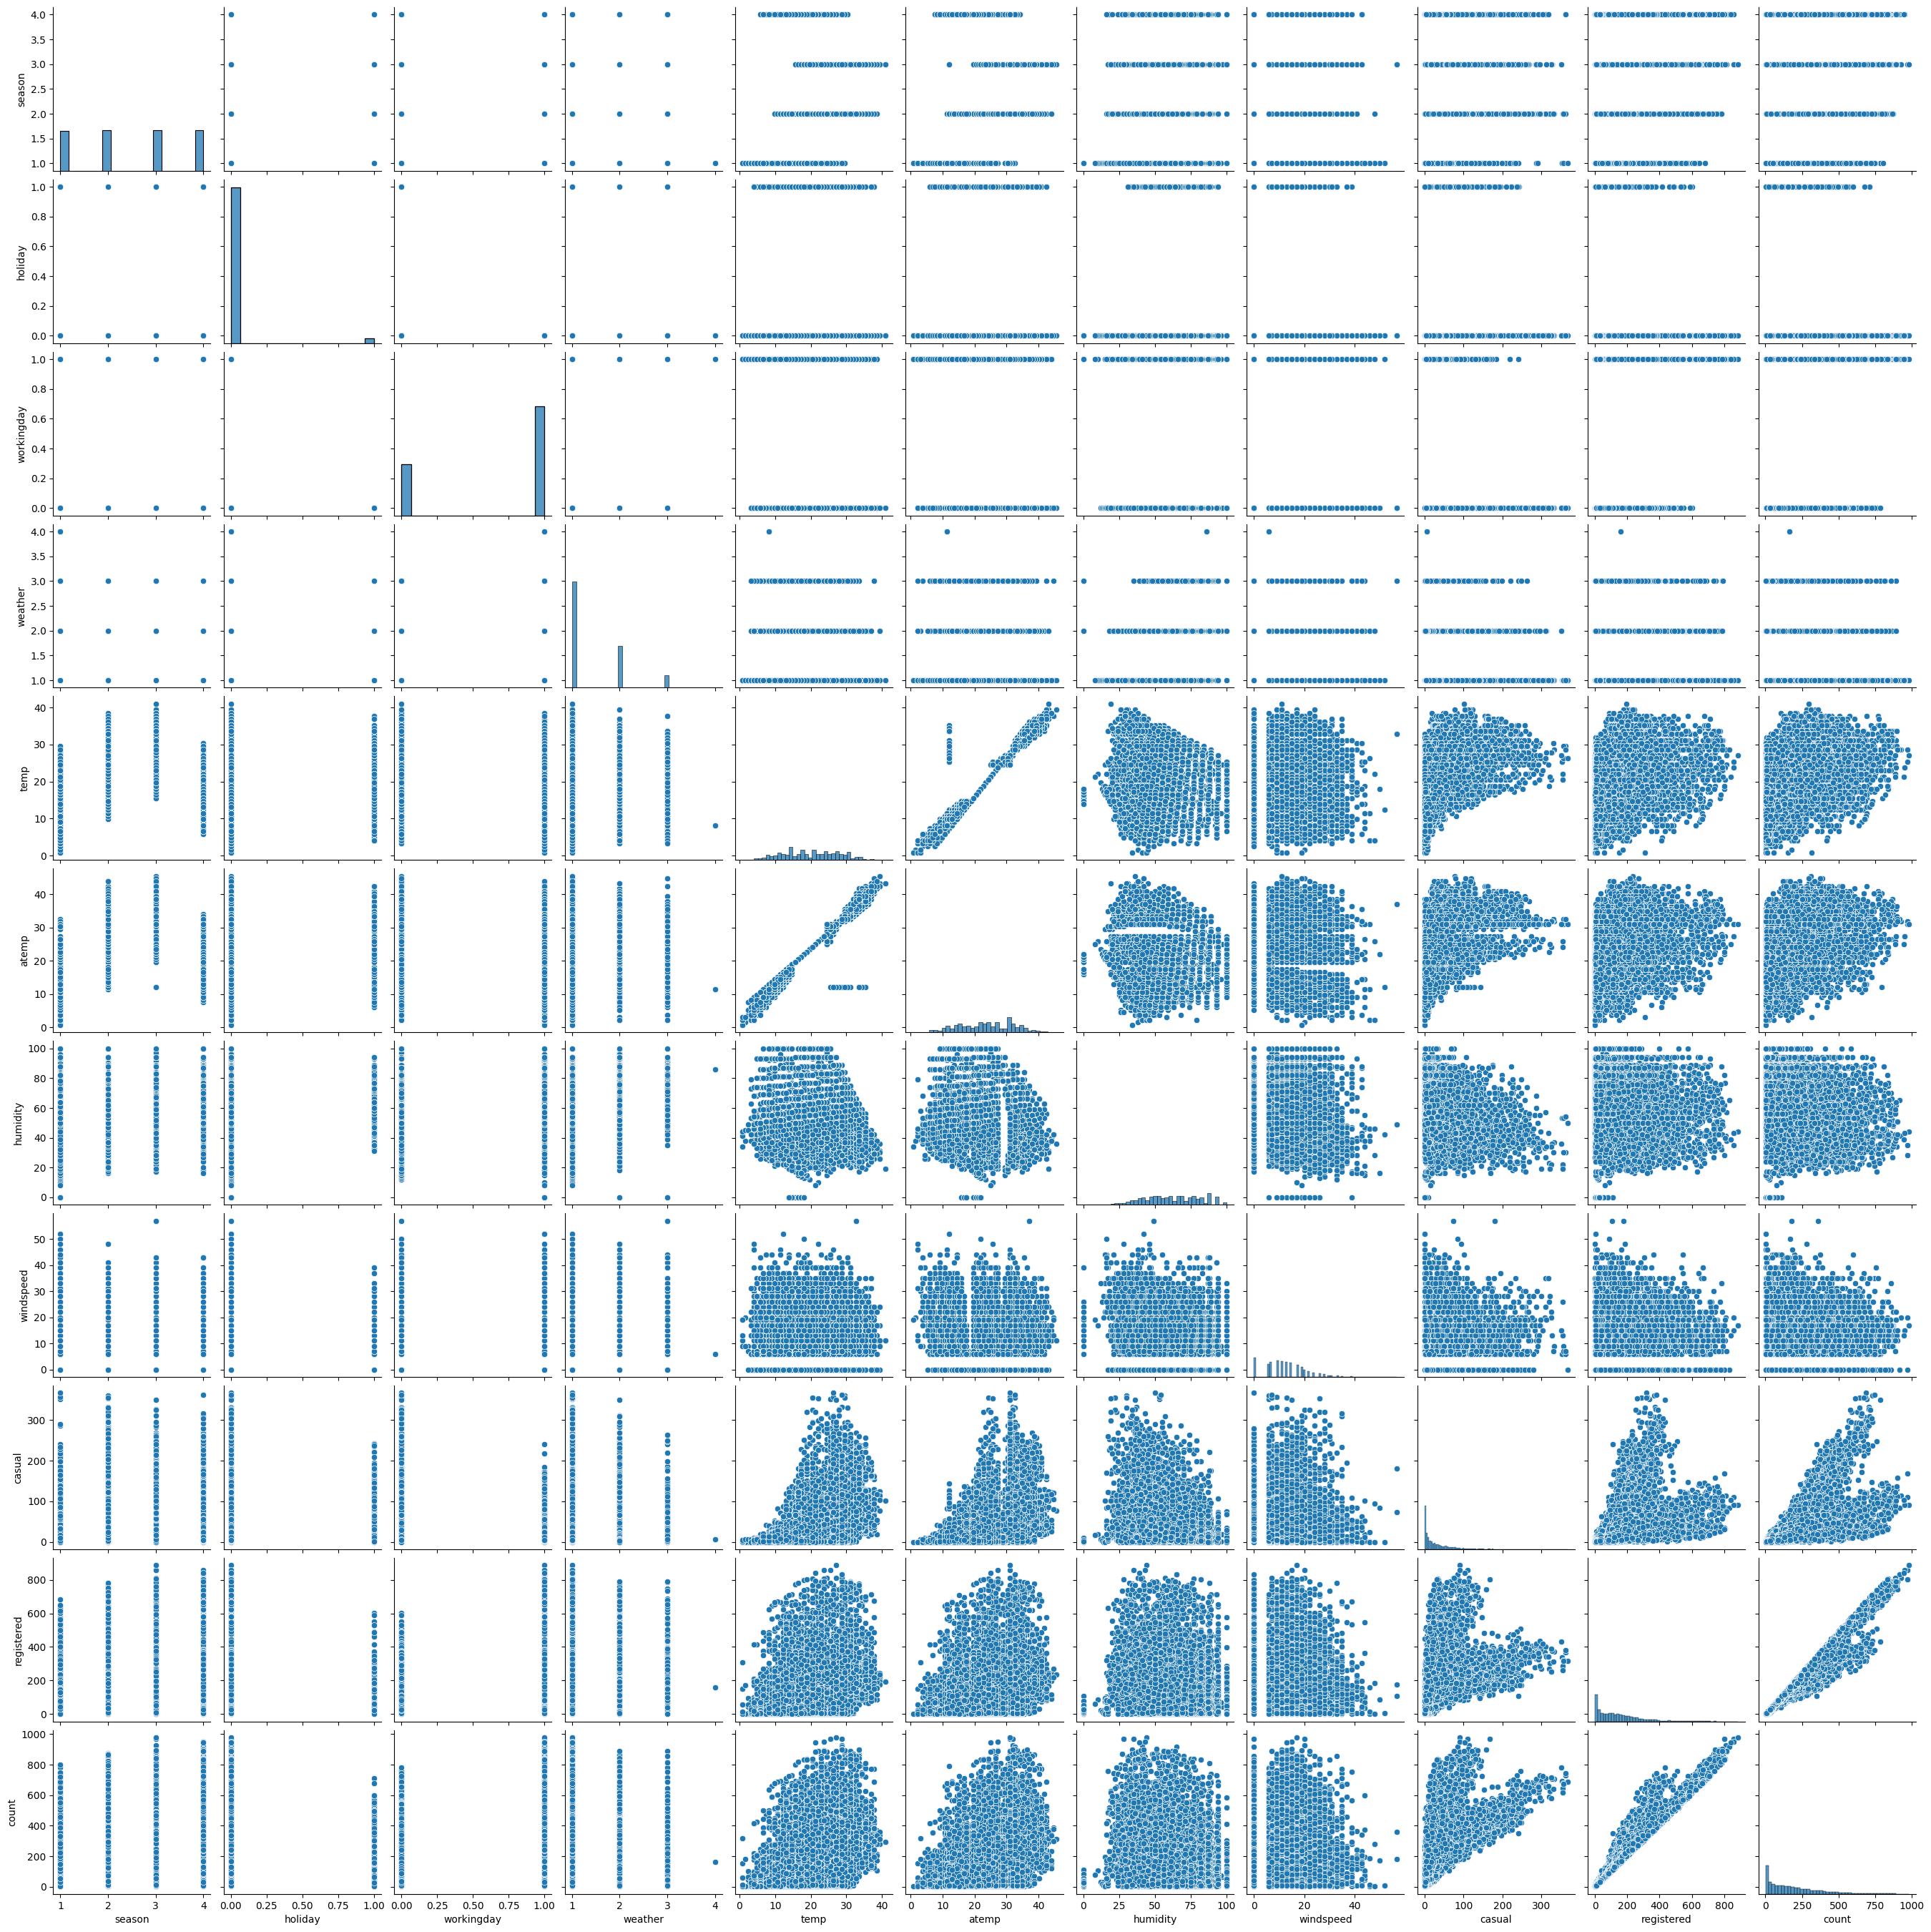

In [ ]:
sns.pairplot(df)
plt.show()

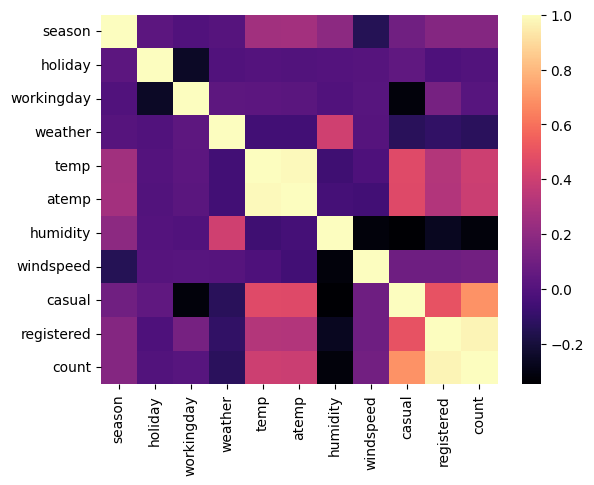

In [ ]:
sns.heatmap(df.corr(), cmap='magma')
plt.show()

**Illustrate the insights based on EDA**

Comments on range of attributes, outliers of various attributes

In [ ]:
## To check the range of attributes
for i in df.columns.tolist():
  print (f"Minimum value for {i} is {df[i].min()} & Maximum value for {i} is {df[i].max()}")
  print ("-"*100)
  print()

Minimum value for datetime is 2011-01-01 00:00:00 & Maximum value for datetime is 2012-12-19 23:00:00
----------------------------------------------------------------------------------------------------

Minimum value for season is 1 & Maximum value for season is 4
----------------------------------------------------------------------------------------------------

Minimum value for holiday is 0 & Maximum value for holiday is 1
----------------------------------------------------------------------------------------------------

Minimum value for workingday is 0 & Maximum value for workingday is 1
----------------------------------------------------------------------------------------------------

Minimum value for weather is 1 & Maximum value for weather is 4
----------------------------------------------------------------------------------------------------

Minimum value for temp is 0.82 & Maximum value for temp is 41.0
----------------------------------------------------------------

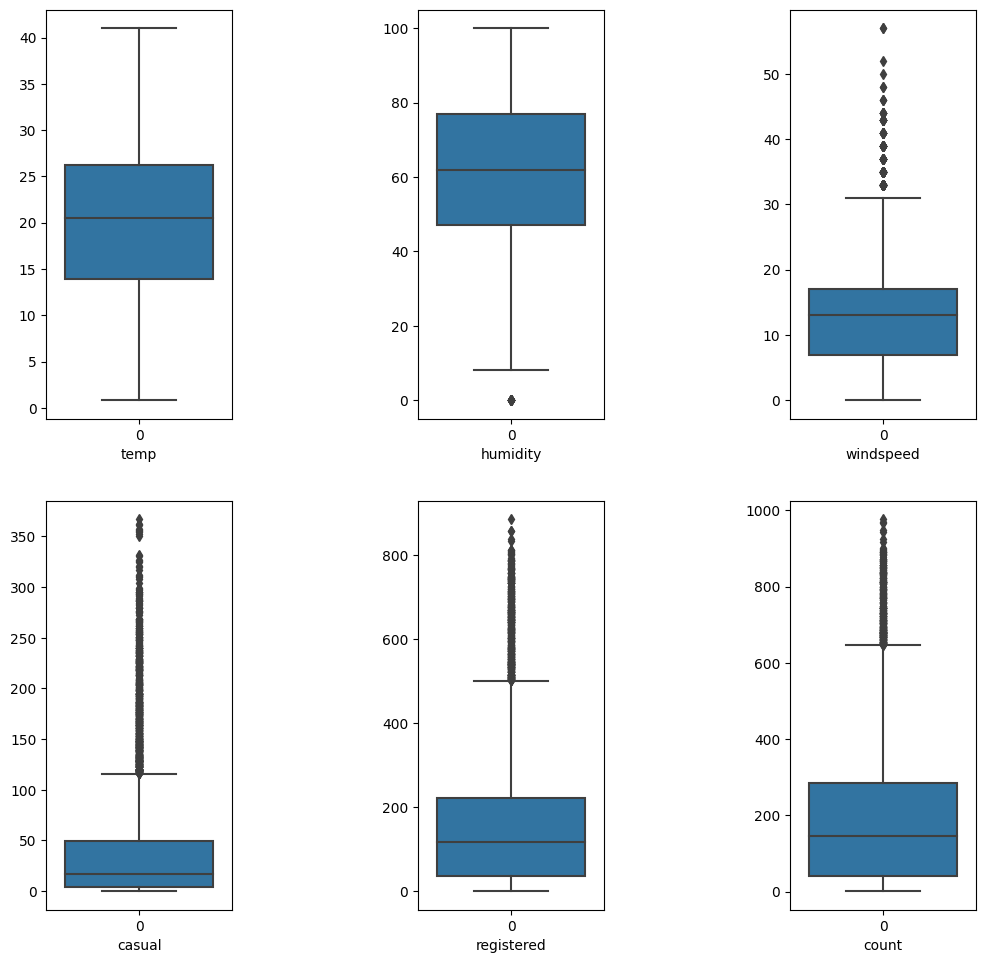

In [ ]:
## Let us check the outliers using box plot

data1 = df[['temp','humidity','windspeed','casual','registered','count']]
plt.figure(figsize=(12,3))
plt.subplots_adjust(top=2, bottom=-1, wspace=1)
x=1
while x<7:
  for i in data1:
    plt.subplot(2,3,x)
    sns.boxplot(df[i], orient='v')
    plt.xlabel(i)
    x+=1

In [ ]:
np.percentile(data1['temp'],25)

13.94

In [ ]:
## Using IQR

for i in data1.columns.tolist():
  x_25 = np.percentile(data1[i],25)
  x_75 = np.percentile(data1[i],75)
  iqr = x_75 - x_25
  lower_limit = max(x_25 - 1.5*(iqr),0)
  upper_limit = x_75 + 1.5*(iqr)
  print(f"Upper Limit of {i}:{upper_limit} & Lower Limit of {i}:{lower_limit}")
  print()

Upper Limit of temp:44.69 & Lower Limit of temp:0

Upper Limit of humidity:122.0 & Lower Limit of humidity:2.0

Upper Limit of windspeed:31.992500000000003 & Lower Limit of windspeed:0

Upper Limit of casual:116.5 & Lower Limit of casual:0

Upper Limit of registered:501.0 & Lower Limit of registered:0

Upper Limit of count:647.0 & Lower Limit of count:0



In [ ]:
## Using z score

for i in data1.columns.tolist():
  x_mean = data1[i].mean()
  x_std = data1[i].std()
  outlier = []
  for j in data1[i]:
    z = (j-x_mean) / x_std
    if z > 3 or z<-3:
      outlier.append(j)
  print(f"The outlier for {i}: {np.unique(outlier)}")
  print()

The outlier for temp: []

The outlier for humidity: [0]

The outlier for windspeed: [39.0007 40.9973 43.0006 43.9989 46.0022 47.9988 50.0021 51.9987 56.9969]

The outlier for casual: [186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 232 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 249 250 251 253 254 255 256 257 258 259 260
 262 263 264 265 266 267 268 269 272 274 275 276 279 280 282 283 284 286
 287 288 289 291 292 293 294 295 297 298 299 304 308 310 311 312 317 320
 321 325 326 327 331 332 350 352 354 355 356 357 361 362 367]

The outlier for registered: [609 610 613 614 615 616 617 618 619 620 621 622 623 624 625 626 628 629
 631 633 634 636 637 638 639 640 641 642 643 644 645 646 647 648 649 650
 651 652 653 655 656 658 659 660 661 662 663 664 665 666 667 668 669 670
 672 673 675 677 678 679 680 681 682 684 688 689 690 692 693 694 696 

Observation/Comments:

1) Minimum count of bike hired in a particular hour is as low as 1, where as max count is as high as 977

2) Columns Casual, registered and counts and lot of outliers

3) Since outliers are very high in Casual, Registered and COunt columns, they might have signicant role in demand of rental bikes hence its a suggestion not to treat outliers.

Comments on the distribution of the variables and relationship between them


---





In [ ]:
## Distribution of Variables


In [ ]:
pd.crosstab(df['holiday'], 'no_of_counts').sort_values(by='no_of_counts').style.background_gradient(cmap='viridis',axis=None, vmin=300, vmax=99999)

col_0,no_of_counts
holiday,
1,311
0,10575


In [ ]:
df.groupby(['holiday'])['count'].sum()

holiday
0    2027668
1      57808
Name: count, dtype: int64

In [ ]:
pd.crosstab(df['season'], 'no_of_counts').sort_values(by='no_of_counts').style.background_gradient(cmap='viridis',axis=None, vmin=2600, vmax=2800)

col_0,no_of_counts
season,
1,2686
2,2733
3,2733
4,2734


In [ ]:
df.groupby(['season'])['count'].sum()

season
1    312498
2    588282
3    640662
4    544034
Name: count, dtype: int64

In [ ]:
pd.crosstab(df['workingday'], 'no_of_counts').sort_values(by='no_of_counts').style.background_gradient(cmap='viridis',axis=None, vmin=3400, vmax=7800)

col_0,no_of_counts
workingday,
0,3474
1,7412


In [ ]:
df.groupby(['workingday'])['count'].sum()

workingday
0     654872
1    1430604
Name: count, dtype: int64

In [ ]:
pd.crosstab(df['weather'], 'no_of_counts').sort_values(by='no_of_counts').style.background_gradient(cmap='viridis',axis=None, vmin=1, vmax=7800)


col_0,no_of_counts
weather,
4,1
3,859
2,2834
1,7192


In [ ]:
df.groupby(['weather'])['count'].sum()

weather
1    1476063
2     507160
3     102089
4        164
Name: count, dtype: int64

In [ ]:
## Relation between different attributes
df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


Comments/Insights:

1) Holiday 0 has more number of bike rentals than Holiday 1

2) Working day 1 has more numbers of bike rentals

3) As per the data though season 1 has lesser count on bike rentals however other season has less impact on bike rentals, difference is significantly low (We will deduce its significance futher with hypothesis testing and see if results are similar if we consider population mean)

4) Weather 1 has more bike rentals than other weathers

5) Resgistered users are frequent users

Comments for each univariate and bivariate plots

---



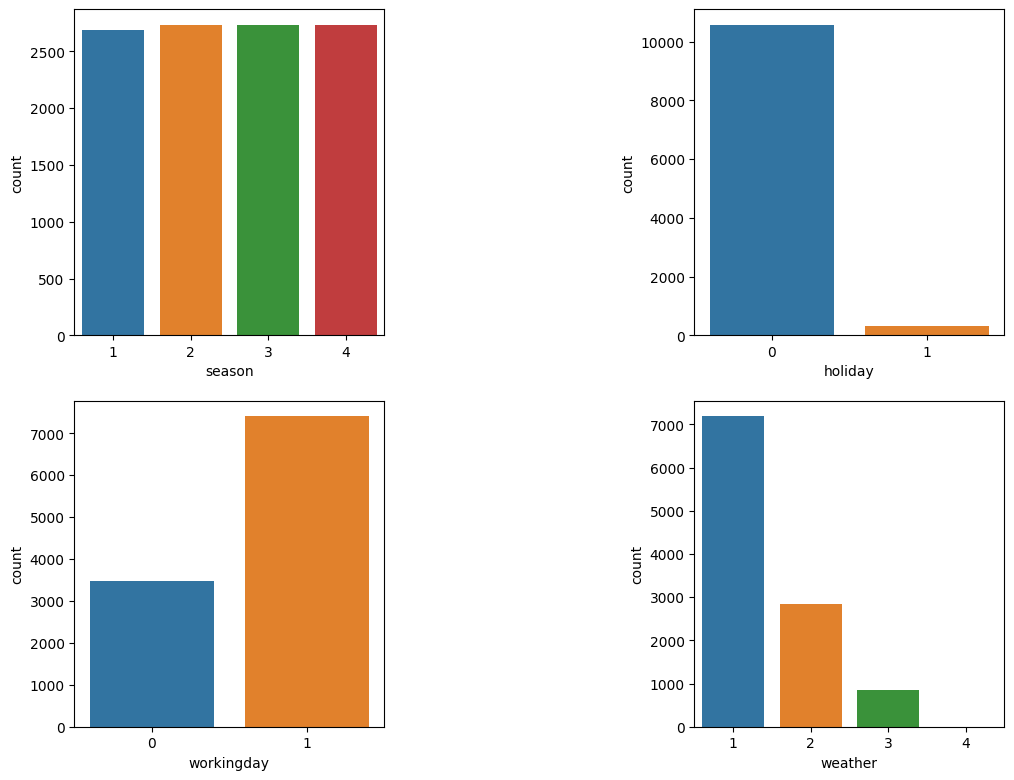

In [ ]:
data = df[['season','holiday','workingday','weather']]
plt.figure(figsize=(12,5))
plt.subplots_adjust(top=2,bottom=-1, wspace=1)
x=1
while x<5:
  for i in data:
    plt.subplot(4,2,x)
    sns.countplot(data, x = i)
    plt.xlabel(i)
    x+=1

Comments/Insights:

Working Day 1 has more number of counts, similarly Holiday 0 has more number of counts, weather 1 has more number of counts. 

Counts for seasons are similar.

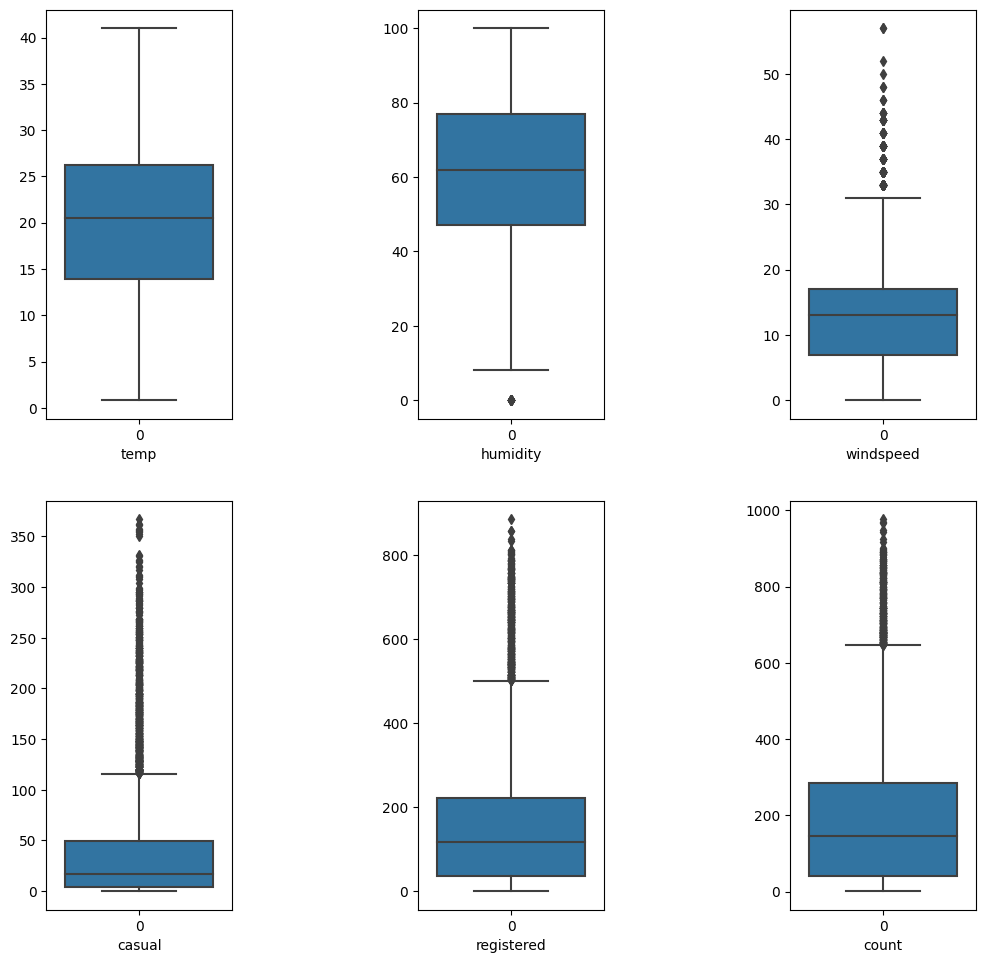

In [ ]:
data1 = df[['temp','humidity','windspeed','casual','registered','count']]
plt.figure(figsize=(12,3))
plt.subplots_adjust(top=2, bottom=-1, wspace=1)
x=1
while x<7:
  for i in data1:
    plt.subplot(2,3,x)
    sns.boxplot(df[i], orient='v')
    plt.xlabel(i)
    x+=1

Comments/Insights:

Lot of outliers in Casual, Registered, count, windspeed

Casual Median is way less than Registered

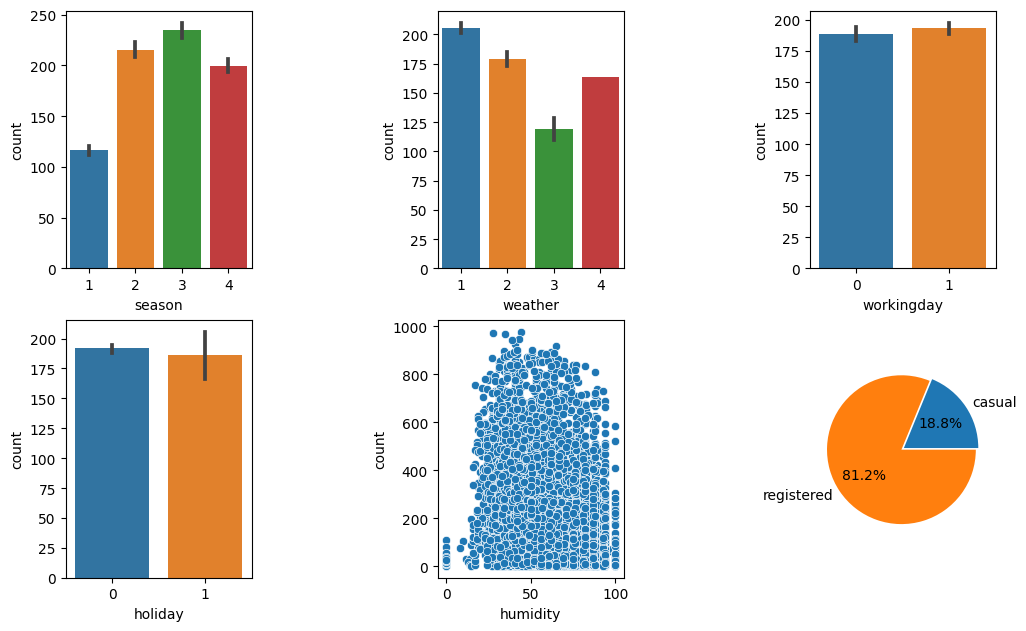

In [ ]:
plt.figure(figsize=(12,3))
plt.subplots_adjust(top=2, wspace=1)

plt.subplot(2,3,1)
sns.barplot(df, x = 'season', y = 'count', estimator=np.mean)

plt.subplot(2,3,2)
sns.barplot(df, x = 'weather', y = 'count', estimator=np.mean)

plt.subplot(2,3,3)
sns.barplot(df, x = 'workingday', y = 'count', estimator=np.mean)

plt.subplot(2,3,4)
sns.barplot(df, x = 'holiday', y = 'count', estimator=np.mean)

plt.subplot(2,3,5)
sns.scatterplot(df,  x='humidity', y='count')

plt.subplot(2,3,6)
a = df['casual'].sum()
b = df['registered'].sum()
labels =['casual','registered']
data = [a,b]
plt.pie(data, labels=labels, explode=[.02,.02],autopct='%1.1f%%')
plt.show()

Insights/Comments:

On an average, the count of bike rentals is more for season 3.

On an average, we see more people at weather 1 renting the bike

Working day have similar average counts in terms of bike rentals

Resigtered users comprise 81.2 % when it comes to renting bikes

# Hypothesis Testing (30 Points):

Since we are to perform T-Test, ANNOVA Test, CHI Square test let us first see the disribution of data, if its a normal distribution or not.

Also for Annova test we need to conduct Levene test to see if Variance are similar

In [ ]:
from scipy.stats import shapiro, levene
from statsmodels.graphics.gofplots import qqplot, qqplot_2samples

In [ ]:
# H0 = Data is drawn from a normal distribution
# Ha = Data is not drawn from a normal distribution
# Significance level alpha is .05

# 1) Let us check Working Day data, working day = 0

workingday_0 = df.loc[df['workingday']==0]['count']
alpha = 0.05
stats, p_value = shapiro(workingday_0)
print (f'p_value is {p_value}')
if p_value<alpha:
  print("Reject Null Hypothesis")
else:
  print ('Failed to reject Null Hypothesis')


p_value is 4.203895392974451e-45
Reject Null Hypothesis


In [ ]:
workingday_1 = df.loc[df['workingday']==1]['count']
alpha = 0.05
stats, p_value = shapiro(workingday_1)
print (f'p_value is {p_value}')
if p_value<alpha:
  print("Reject Null Hypothesis")
else:
  print ('Failed to reject Null Hypothesis')

p_value is 0.0
Reject Null Hypothesis


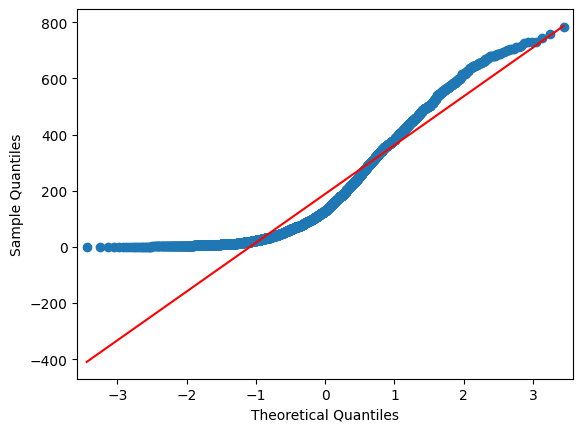

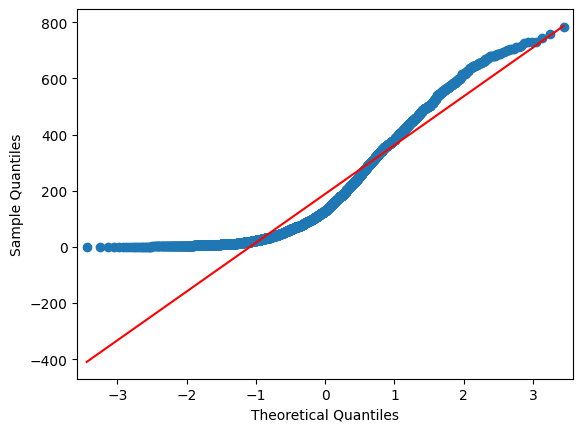

In [ ]:
qqplot(workingday_0, line='s')

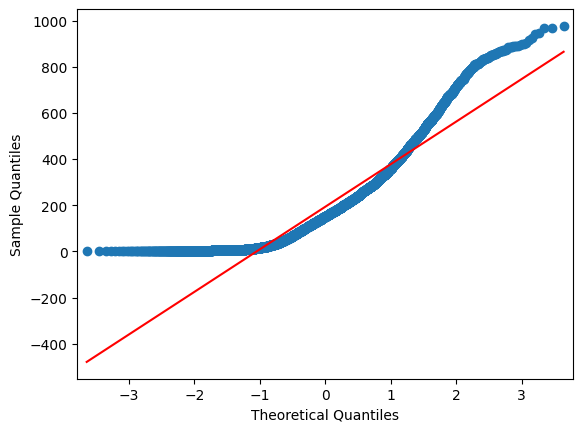

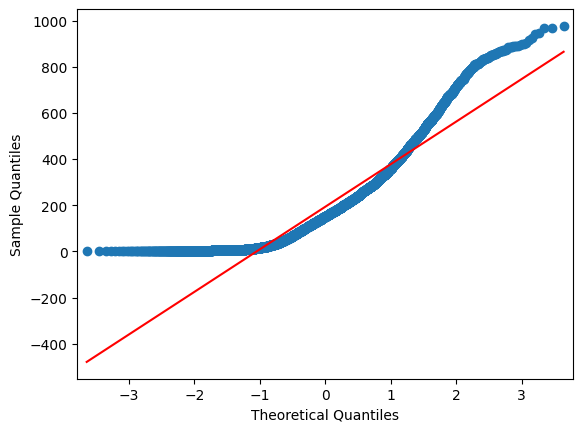

In [ ]:
## Let us look the disrtibution using qq plot
qqplot(workingday_1, line='s')

In [ ]:
# H0 = Data is drawn from a normal distribution (for Weather = 1)
# Ha = Data is not drawn from a normal distribution
# Significance level alpha is .05

# 1) Let us check Working Day data
weather_1 = df.loc[df['weather']==1]['count']
alpha = 0.05
stats, p_value = shapiro(weather_1)
print(f'p_value is {p_value}')
if p_value<alpha:
  print("Reject Null Hypothesis")
else:
  print ('Failed to reject Null Hypothesis')


0.0
Reject Null Hypothesis


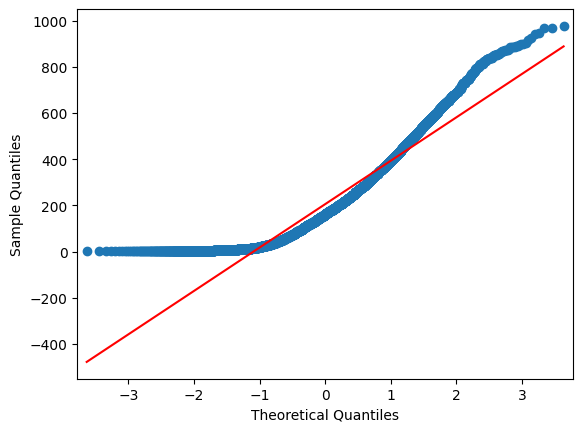

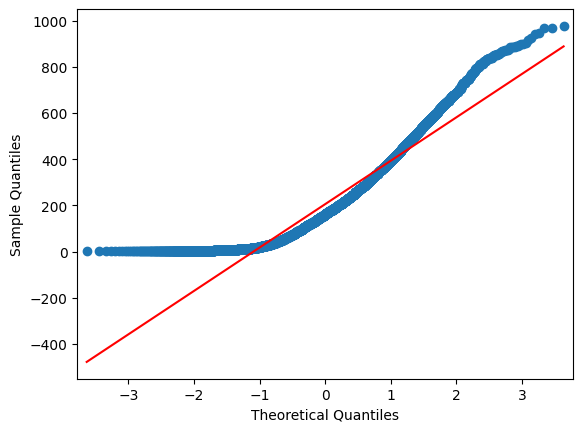

In [ ]:
qqplot(weather_1, line='s')

In [ ]:
# H0 = Data is drawn from a normal distribution (for Weather = 2)
# Ha = Data is not drawn from a normal distribution
# Significance level alpha is .05

weather_2 = df.loc[df['weather']==2]['count']

alpha = 0.05
stats, p_value = shapiro(weather_2)
print(f'p_value is {p_value}')
if p_value<alpha:
  print("Reject Null Hypothesis")
else:
  print ('Failed to reject Null Hypothesis')

9.781063280987223e-43
Reject Null Hypothesis


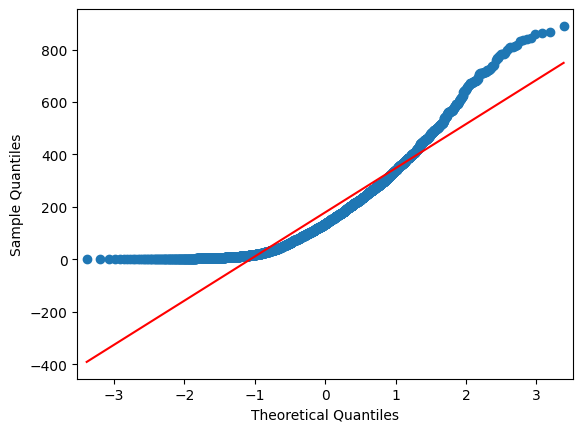

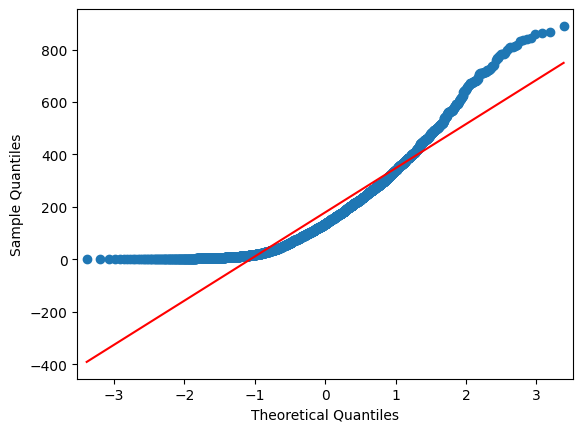

In [ ]:
qqplot(weather_2, line='s')

In [ ]:
# H0 = Data is drawn from a normal distribution (for Weather = 3)
# Ha = Data is not drawn from a normal distribution
# Significance level alpha is .05

weather_3 = df.loc[df['weather']==3]['count']

alpha = 0.05
stats, p_value = shapiro(weather_3)
print(f'p_value is {p_value}')
if p_value<alpha:
  print("Reject Null Hypothesis")
else:
  print ('Failed to reject Null Hypothesis')

3.876090133422781e-33
Reject Null Hypothesis


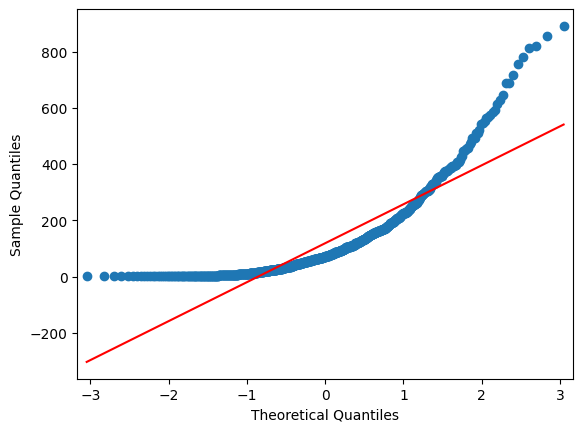

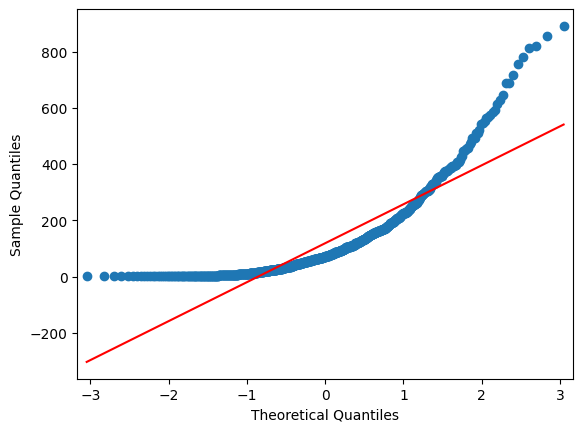

In [ ]:
qqplot(weather_3, line='s')

In [ ]:
## We cannot check the data for weather =4 as the data length is only 1
weather_4 = df.loc[df['weather']==4]['count']

weather_4 

5631    164
Name: count, dtype: int64

In [ ]:
# H0 = Data is drawn from a normal distribution (for Season = 1)
# Ha = Data is not drawn from a normal distribution
# Significance level alpha is .05

# 1) Let us check Working Day data
season_1 = df.loc[df['season']==1]['count']
alpha = 0.05
stats, p_value = shapiro(season_1)
print(f'p_value is {p_value}')
if p_value<alpha:
  print("Reject Null Hypothesis")
else:
  print ('Failed to reject Null Hypothesis')


0.0
Reject Null Hypothesis


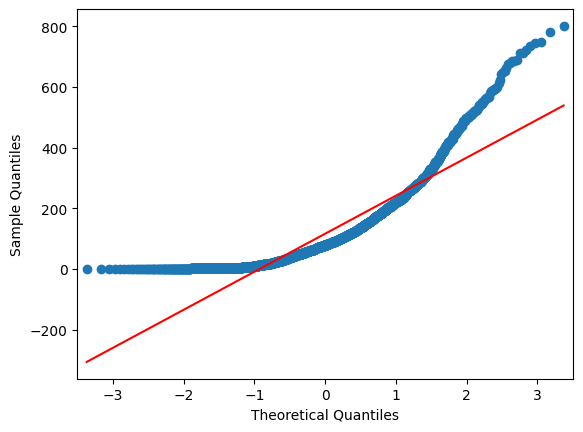

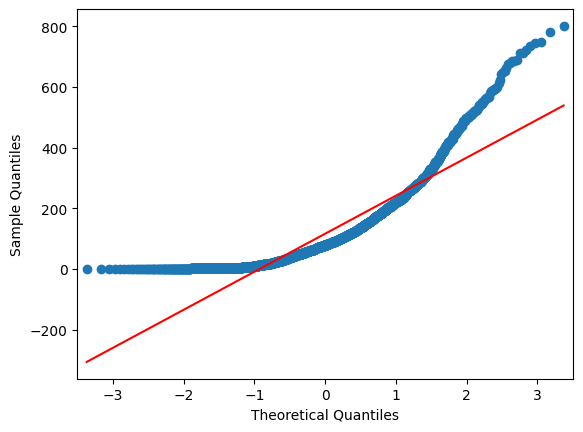

In [ ]:
qqplot(season_1, line='s')

In [ ]:
# H0 = Data is drawn from a normal distribution (for Season = 2)
# Ha = Data is not drawn from a normal distribution
# Significance level alpha is .05

# 1) Let us check Working Day data
season_2 = df.loc[df['season']==2]['count']
alpha = 0.05
stats, p_value = shapiro(season_2)
print(f'p_value is {p_value}')
if p_value<alpha:
  print("Reject Null Hypothesis")
else:
  print ('Failed to reject Null Hypothesis')

6.039093315091269e-39
Reject Null Hypothesis


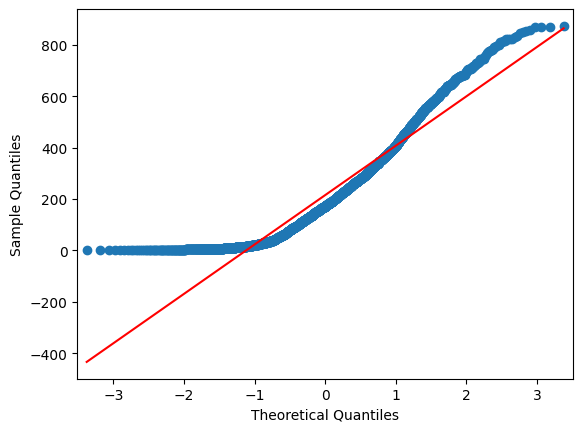

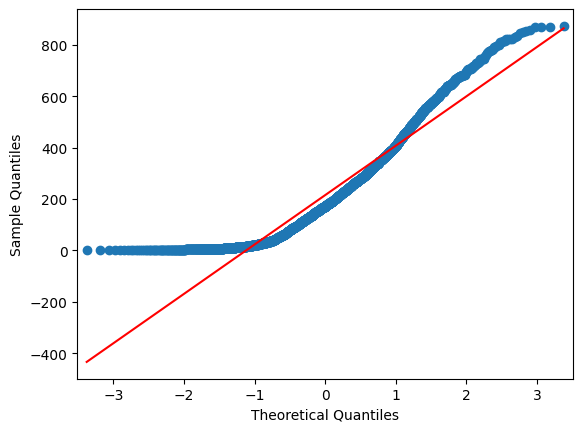

In [ ]:
qqplot(season_2, line='s')

In [ ]:
# H0 = Data is drawn from a normal distribution (for Season = 3)
# Ha = Data is not drawn from a normal distribution
# Significance level alpha is .05

# 1) Let us check Working Day data
season_3 = df.loc[df['season']==3]['count']
alpha = 0.05
stats, p_value = shapiro(season_3)
print(f'p_value is {p_value}')
if p_value<alpha:
  print("Reject Null Hypothesis")
else:
  print ('Failed to reject Null Hypothesis')

1.043458045587339e-36
Reject Null Hypothesis


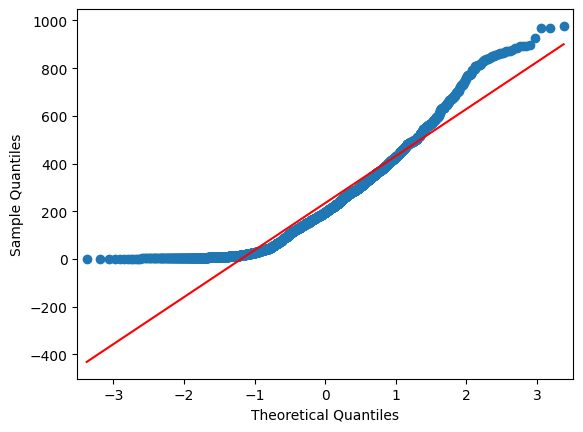

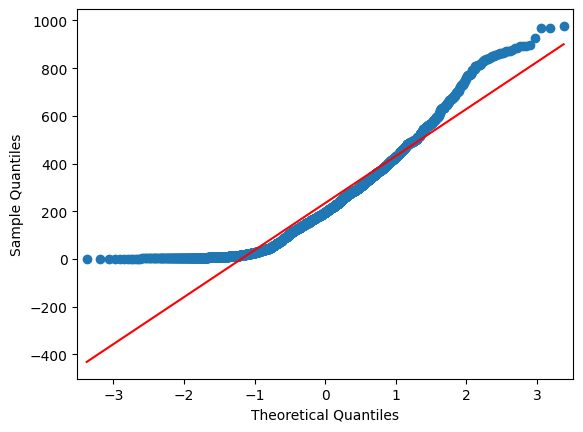

In [ ]:
qqplot(season_3, line='s')

In [ ]:
# H0 = Data is drawn from a normal distribution (for Season = 4)
# Ha = Data is not drawn from a normal distribution
# Significance level alpha is .05

# 1) Let us check Working Day data
season_4 = df.loc[df['season']==4]['count']
alpha = 0.05
stats, p_value = shapiro(season_4)
print(f'p_value is {p_value}')
if p_value<alpha:
  print("Reject Null Hypothesis")
else:
  print ('Failed to reject Null Hypothesis')

1.1301682309549298e-39
Reject Null Hypothesis


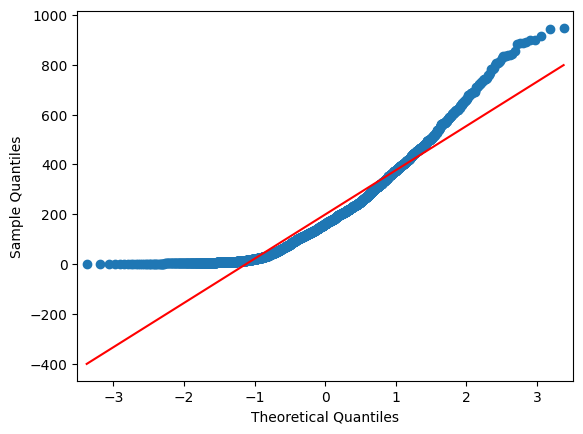

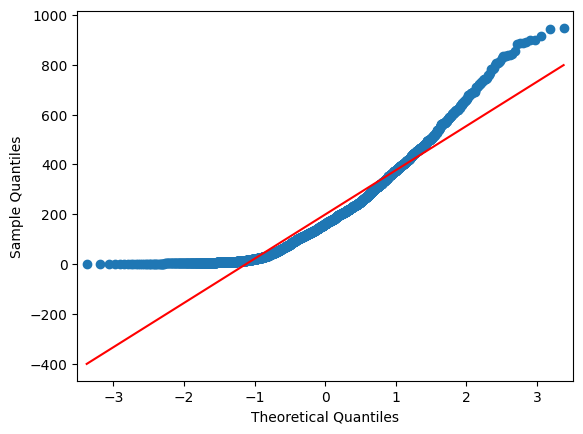

In [ ]:
qqplot(season_4, line='s')

Since no data is following the normal distribution, we can apply boxcox however that is out of scope for the current project hence leaving it be

In [ ]:
## Let us check the if variance are similar for weather and season using levene test

In [ ]:
# H0 = All the weather data has similar or equal variance 
# Ha = Data has different variance
# Significance level alpha is .05

alpha = 0.05
stats, p_value = levene(weather_1, weather_2, weather_3,  weather_4)
print(f'p_value is {p_value}')
if p_value<alpha:
  print("Reject Null Hypothesis")
else:
  print ('Failed to reject Null Hypothesis')

3.504937946833238e-35
Reject Null Hypothesis


In [ ]:
# H0 = All the season data has similar or equal variance 
# Ha = Data has different variance
# Significance level alpha is .05

alpha = 0.05
stats, p_value = levene(season_1, season_2, season_3, season_4)
print(f'p_value is {p_value}')
if p_value<alpha:
  print("Reject Null Hypothesis")
else:
  print ('Failed to reject Null Hypothesis')

1.0147116860043298e-118
Reject Null Hypothesis


We will be anyways proceding with the tests as we are asked the same

**2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented (10 points)**

In [ ]:
## As per the data we can see the average rental is more on working day (workingday=1) then on other days
working_count = df.groupby(['workingday'])['count'].mean().reset_index()
pd.pivot_table(working_count, index= 'workingday',values= 'count').style.background_gradient(cmap='magma',axis=None, vmin=188, vmax=194)

,count
workingday,
0,188.506621
1,193.011873


In [ ]:
## Let us see if the above observation is statistically significant at 5 % significance(95% confidence)
# H0 = The average rental for working day 0 and working day 1 is same is Mu0 =Mu1
# Ha = M1>M0
# This will be a right skewed
# Significance level alpha is .05

workingday_0 = df.loc[df['workingday']==0]['count']
workingday_1 = df.loc[df['workingday']==1]['count']
alpha = 0.05
stats, p_value = ttest_ind(workingday_0,workingday_1, alternative='greater')
print(f'p_value is {p_value}')
if p_value<alpha:
  print("Reject Null Hypothesis")
else:
  print ('Failed to reject Null Hypothesis')

0.8867759788681933
Failed to reject Null Hypothesis


In [ ]:
# H0 = The average rental for working day 0 and working day 1 is same is Mu0 =Mu1
# Ha = M1!=M0
# This will be a right skewed
# Significance level alpha is .05

workingday_0 = df.loc[df['workingday']==0]['count']
workingday_1 = df.loc[df['workingday']==1]['count']
alpha = 0.05
stats, p_value = ttest_ind(workingday_0,workingday_1)
print(f'p_value is {p_value}')
if p_value<alpha:
  print("Reject Null Hypothesis")
else:
  print ('Failed to reject Null Hypothesis')

0.22644804226361348
Failed to reject Null Hypothesis


In [ ]:
## The above test concludes that on population level, working day does not effect bike rentals with 95 % confidence

**ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season (10 points)**

In [ ]:
## As per the data we can see the average rental is more on weather 1 then on other weathers
weather_count = df.groupby(['weather'])['count'].mean().reset_index()
pd.pivot_table(weather_count, index= 'weather',values= 'count').style.background_gradient(cmap='magma',axis=None, vmin=160, vmax=205)

,count
weather,
1,205.236791
2,178.955540
3,118.846333
4,164.000000


In [ ]:
# H0 = There is no difference in population mean for different weathers
# Ha = There is a difference with atleast one of the weather
# Significance level alpha is .05

weather_1 = df.loc[df['weather']==1]['count']
weather_2 = df.loc[df['weather']==2]['count']
weather_3 = df.loc[df['weather']==3]['count']
weather_4 = df.loc[df['weather']==4]['count']


alpha = 0.05
stats, p_value = f_oneway(weather_1,weather_2,weather_3,weather_4)
print(f'p_value is {p_value}')
if p_value<alpha:
  print("Reject Null Hypothesis")
else:
  print ('Failed to reject Null Hypothesis')

5.482069475935669e-42
Reject Null Hypothesis


In [ ]:
## We can conclude that atleast one of the weather has impact on sample average at population level with 95 % confidence

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df['season'].unique()

array([1, 2, 3, 4])

In [ ]:
## As per the data we can see the average rental is less in season 1. 
season_count = df.groupby(['season'])['count'].mean().reset_index()
pd.pivot_table(season_count, index= 'season',values= 'count').style.background_gradient(cmap='magma',axis=None, vmin=115, vmax=199)

,count
season,
1,116.343261
2,215.251372
3,234.417124
4,198.988296


In [ ]:
# H0 = There is no difference in population mean for different seasons
# Ha = There is a difference with atleast one of the season
# Significance level alpha is .05

season_1 = df.loc[df['season']==1]['count']
season_2 = df.loc[df['season']==2]['count']
season_3 = df.loc[df['season']==3]['count']
season_4 = df.loc[df['season']==4]['count']


alpha = 0.05
stats, p_value = f_oneway(season_1,season_2,season_3,season_4)
print(f'p_value is {p_value}')
if p_value<alpha:
  print("Reject Null Hypothesis")
else:
  print ('Failed to reject Null Hypothesis')

p_value is 6.164843386499654e-149
Reject Null Hypothesis


In [ ]:
## We can conclude that atleast one of the season has impact on sample average at population level with 95 % confidence

**Chi-square test to check if Weather is dependent on the season (10 points)**

In [ ]:
# H0 = Weather is independent of the season
# Ha = Weather is dependent on the season
# Significance level alpha is .05

weather = df.groupby(['weather'])['count'].mean()
season = df.groupby(['season'])['count'].mean()


alpha = 0.05
stats, p_value,dof,expected_value = chi2_contingency(weather,season)
print(f'p_value is {p_value}')
if p_value<alpha:
  print("Reject Null Hypothesis")
else:
  print ('Failed to reject Null Hypothesis')

p_value is 1.0
Failed to reject Null Hypothesis


In [ ]:
## We can conclude that weather is independent of the season

# Recommendation

Season has impact on bike rentals, Yulu can see which all location points has good demands on the particular season and add additional bikes

Weather has impact on bike rentals, Yulu should add weather forecasting in their app, push notification to users of upcoming weather and if they are to visit places they could use the weather information and save themself from heavy rain(Probably plan a ride before, as it is about to rain in next few hours, hurry up rent a bike).

Since there are lot of outliers in counts column, we can safely assume that at some days, there are lot of bike being rent out, Yulu should look into the reasons and promote the rentals accordingly

18% of unresigtered users been renting the bike, Yulu must see how their experience is, give them discounts if they resigter, also keep a track if unresigtered customers are converted or not.